In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Load datasets from Kaggle paths
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Gender_submission shape:", gender_submission.shape)

train_df.head()


Train shape: (891, 12)
Test shape: (418, 11)
Gender_submission shape: (418, 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Info and basic stats
print(train_df.info())
print(train_df.describe())           # numeric
print(train_df.describe(include="O"))  # categorical

# Missing values
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Drop Cabin (too many missing values)
for df in [train_df, test_df]:
    if "Cabin" in df.columns:
        df.drop(columns=["Cabin"], inplace=True)

# Fill Embarked with mode
for df in [train_df, test_df]:
    if "Embarked" in df.columns:
        df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Fill Age with median
for df in [train_df, test_df]:
    if "Age" in df.columns:
        df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill Fare missing in test with median
if "Fare" in test_df.columns:
    test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# Check remaining missing values
print("Train missing:\n", train_df.isnull().sum())
print("Test missing:\n", test_df.isnull().sum())


Train missing:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Test missing:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipykernel_47/3820170879.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
/tmp/ipykernel_47/3820170879.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [5]:
for df in [train_df, test_df]:
    # FamilySize
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

    # IsAlone
    df["IsAlone"] = np.where(df["FamilySize"] == 1, 1, 0)

    # Title from Name (Mr, Mrs, Miss, etc.)
    df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    df["Title"] = df["Title"].replace(
        ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"],
        "Rare"
    )
    df["Title"] = df["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})


In [6]:
train_enc = train_df.copy()

# Map Sex and Embarked
train_enc["Sex"] = train_enc["Sex"].map({"male": 0, "female": 1})
train_enc["Embarked"] = train_enc["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Encode Title as category codes
train_enc["Title"] = train_enc["Title"].astype("category").cat.codes


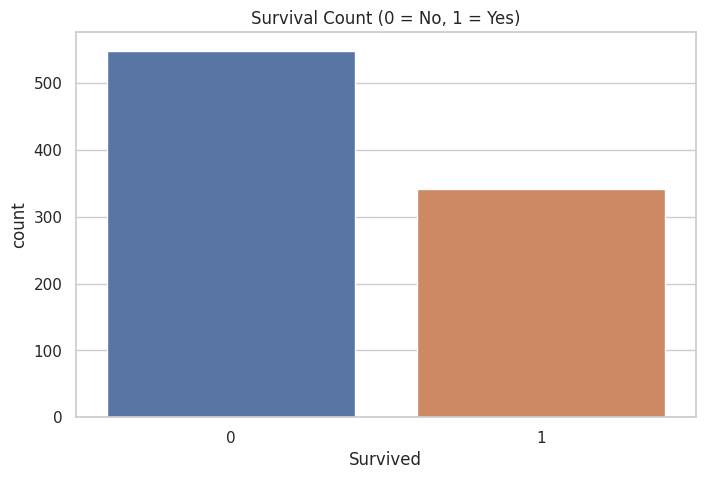

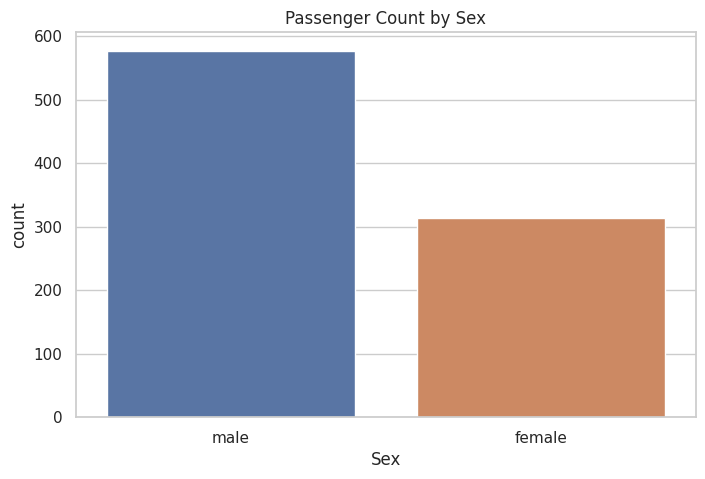

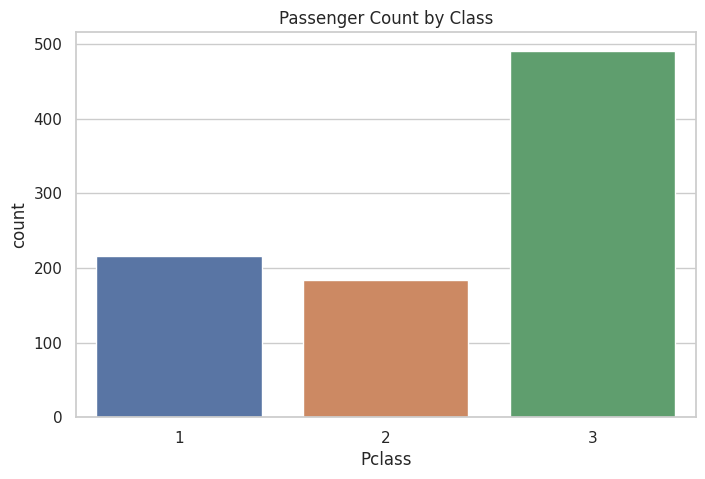

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


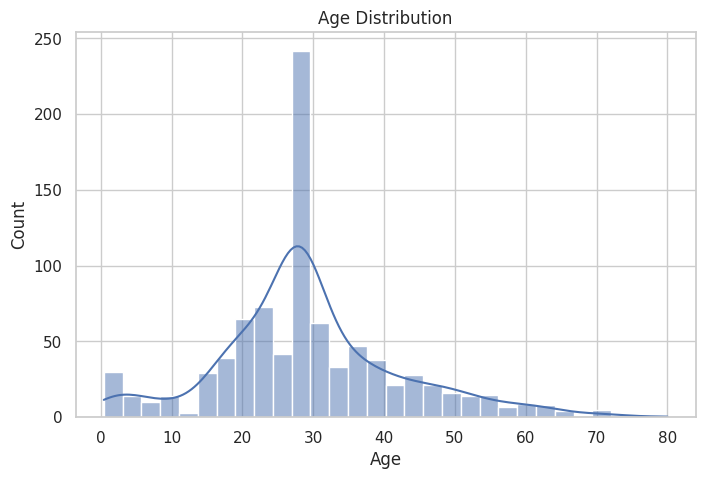

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


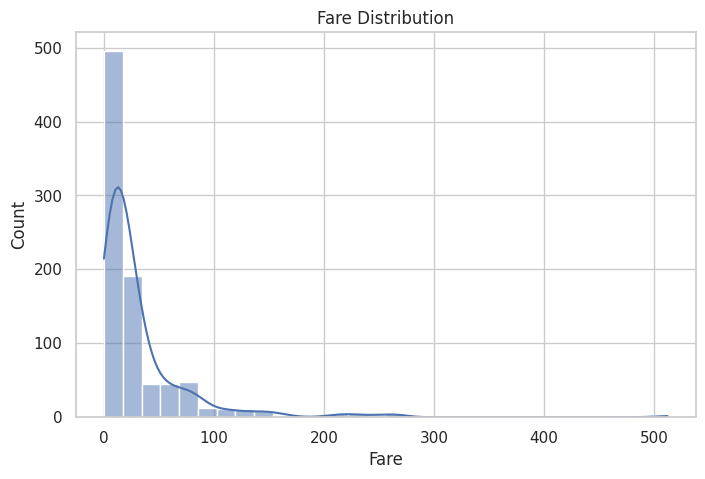

In [7]:
# Target
sns.countplot(data=train_df, x="Survived")
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Sex
sns.countplot(data=train_df, x="Sex")
plt.title("Passenger Count by Sex")
plt.show()

# Pclass
sns.countplot(data=train_df, x="Pclass")
plt.title("Passenger Count by Class")
plt.show()

# Age distribution
sns.histplot(data=train_df, x="Age", bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(data=train_df, x="Fare", bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()


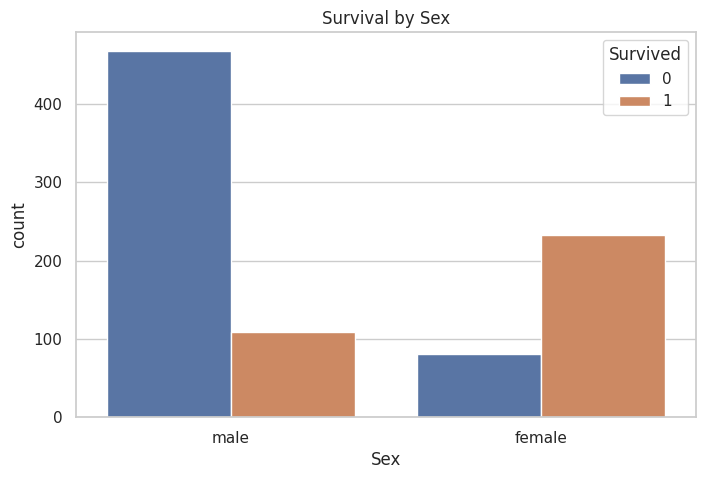

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


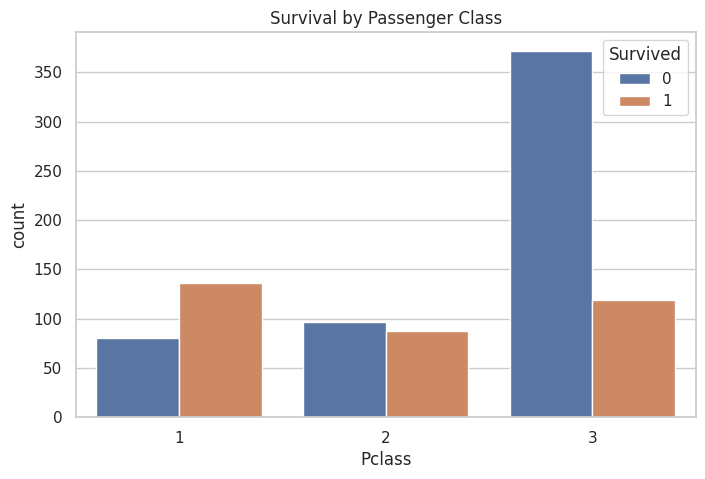

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


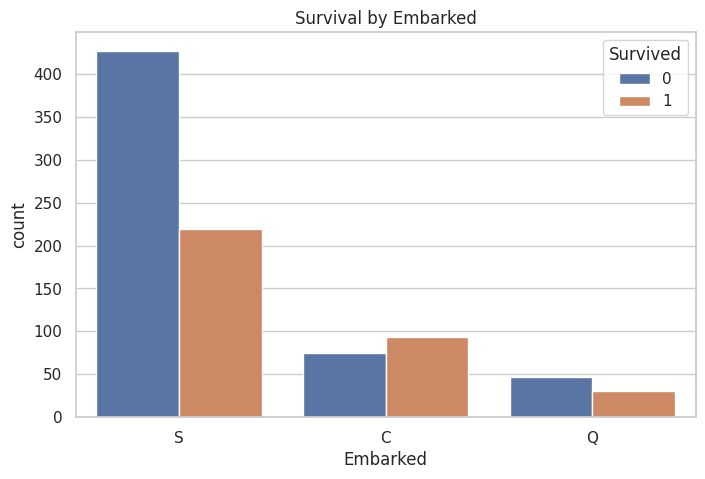

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


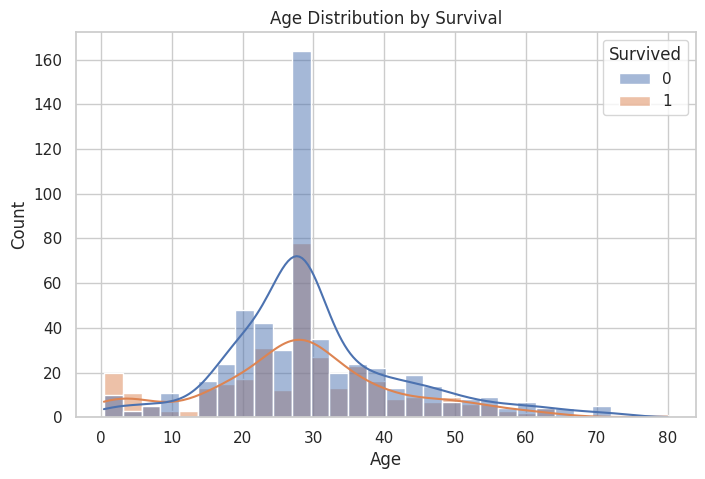

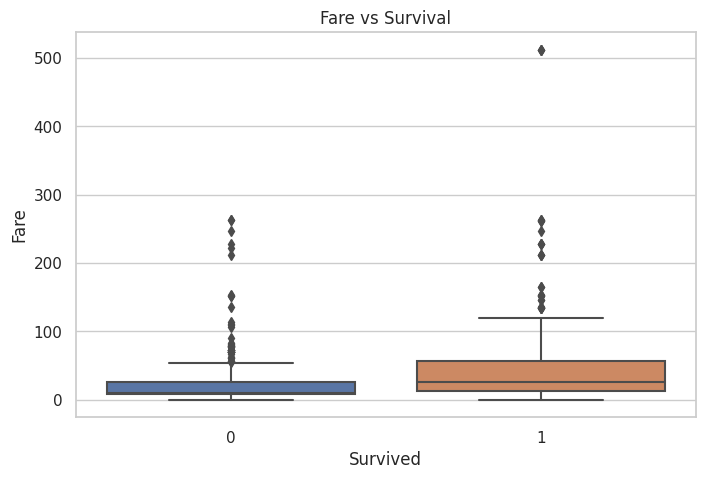

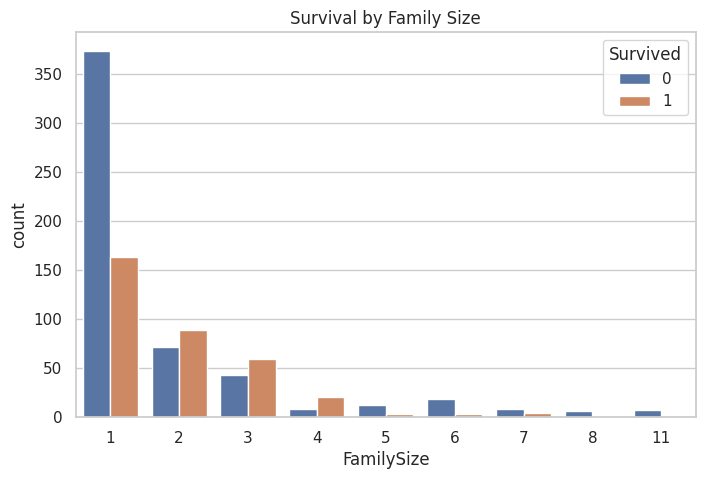

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


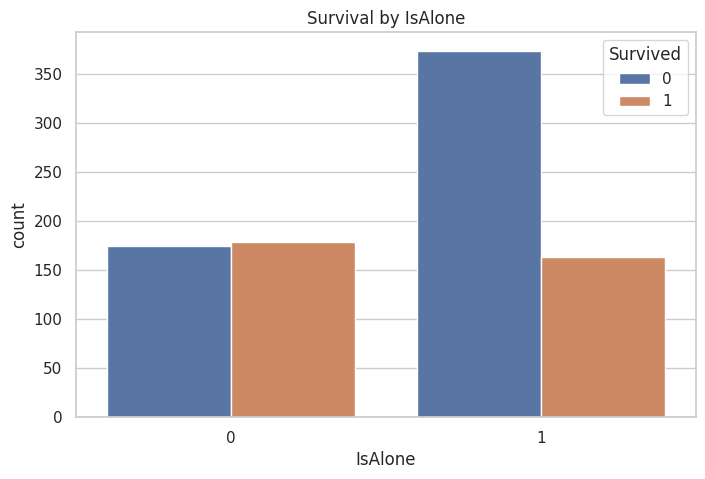

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


In [8]:
# Survival by Sex
sns.countplot(data=train_df, x="Sex", hue="Survived")
plt.title("Survival by Sex")
plt.show()
print(train_df.groupby("Sex")["Survived"].mean())

# Survival by Pclass
sns.countplot(data=train_df, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()
print(train_df.groupby("Pclass")["Survived"].mean())

# Survival by Embarked
sns.countplot(data=train_df, x="Embarked", hue="Survived")
plt.title("Survival by Embarked")
plt.show()
print(train_df.groupby("Embarked")["Survived"].mean())

# Age vs Survived
sns.histplot(data=train_df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# Fare vs Survived
sns.boxplot(data=train_df, x="Survived", y="Fare")
plt.title("Fare vs Survival")
plt.show()

# FamilySize and IsAlone vs Survived
sns.countplot(data=train_df, x="FamilySize", hue="Survived")
plt.title("Survival by Family Size")
plt.show()
print(train_df.groupby("FamilySize")["Survived"].mean())

sns.countplot(data=train_df, x="IsAlone", hue="Survived")
plt.title("Survival by IsAlone")
plt.show()
print(train_df.groupby("IsAlone")["Survived"].mean())


Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Title         -0.071174
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64


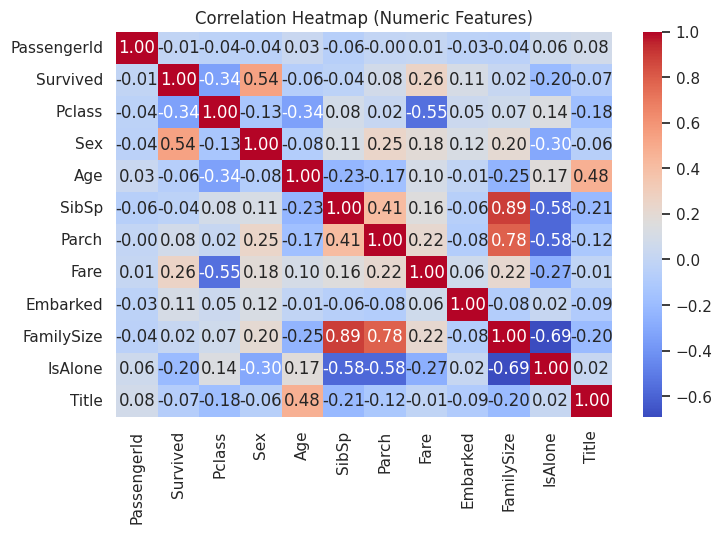

In [10]:
import numpy as np

num_cols = train_enc.select_dtypes(include=[np.number]).columns
corr = train_enc[num_cols].corr()

print(corr["Survived"].sort_values(ascending=False))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
